In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
import os


In [164]:
# !pip install pydicom

In [136]:
path = "ADNI/002_S_0295/Resting_State_fMRI/2012-05-10_15_42_37.0/I303069/ADNI_002_S_0295_MR_Resting_State_fMRI_br_raw_20120511095055857_1930_S150058_I303069.dcm"

fmri = pydicom.dcmread(path)


In [188]:
# print(fmri.preamble)
# print()
# print(fmri.file_meta)
# print()
# print(fmri.filename)
# print()
# print(fmri.fileobj_type)
# print()
# print(fmri.is_implicit_VR)
# print()
# print(fmri.is_little_endian)
# print()
# print(fmri.timestamp)


b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

(0002, 0000) File Meta Information Group Length  UL: 180
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.16.124.113543.6006.99.3765260043261439703
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.124.113543.6006.99.3688024390674402269

ADNI/002_S_0295/R

In [198]:
list(fmri.elements())

[(0008, 0000) Group Length                        UL: 1346,
 (0008, 0005) Specific Character Set              CS: 'ISO_IR 100',
 (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE'],
 (0008, 0013) Instance Creation Time              TM: '162122',
 (0008, 0014) Instance Creator UID                UI: 2.16.124.113543.6006.99.3051493601938435224,
 (0008, 0016) SOP Class UID                       UI: MR Image Storage,
 (0008, 0018) SOP Instance UID                    UI: 2.16.124.113543.6006.99.3765260043261439703,
 (0008, 0020) Study Date                          DA: '20120510',
 (0008, 0021) Series Date                         DA: '20120510',
 (0008, 0022) Acquisition Date                    DA: '20120510',
 (0008, 0023) Content Date                        DA: '20120510',
 (0008, 0030) Study Time                          TM: '154237.000000',
 (0008, 0031) Series Time                         TM: '160237.01000',
 (0008, 0032) Acquisition Time   

In [144]:
fmri.pixel_array


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [32,  8, 17, ...,  9,  9, 24],
       ...,
       [19, 21, 25, ..., 14, 19, 21],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint16)

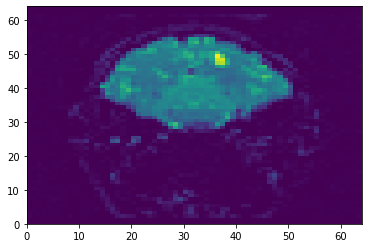

In [161]:
# plt.plot(fmri.pixel_array)
plt.pcolormesh(fmri.pixel_array )

img = fmri.pixel_array

In [210]:
img.size

4096

In [211]:
img.itemsize

2

In [224]:
print("Memory size of numpy array in kb:",(img.size * img.itemsize)/1000)

Memory size of numpy array in kb: 8.192


In [209]:
(300*00*64*64*((img.size * img.itemsize)/1000))/1_000_000

301.989888

In [225]:
gb_for_img = ((img.size * img.itemsize)/1000)/1_000_000
gb_for_img

8.192e-06

In [228]:
300*6720*gb_for_img

16.515072

In [180]:
fmri_image_list = []

path = "ADNI/002_S_0295/Resting_State_fMRI/2012-05-10_15_42_37.0/I303069"
for file in os.listdir(path):
#     print(path + file)
    curr_fmri = pydicom.dcmread(path +"/"+ file)
    fmri_image_list.append(curr_fmri.pixel_array)    
    
fmri_image_list = np.array(fmri_image_list)

In [218]:
len(fmri_image_list)

6720

In [217]:
300*(fmri_image_list.size * fmri_image_list.itemsize / 1e9)

16.515072

In [212]:
fmri_image_list.itemsize

2

In [112]:
fmri_df = pd.read_csv("fMRI_summary.csv")
fmri_df.head()

,Subject ID,Sex,Research Group,Age,Modality,Description,Imaging Protocol,Image ID
0,002_S_0295,M,CN,90.0,fMRI,Resting State fMRI,Manufacturer=Philips Medical Systems;Field Str...,238623
1,002_S_0295,M,CN,91.0,fMRI,Resting State fMRI,Manufacturer=Philips Medical Systems;Field Str...,303069
2,002_S_0413,F,CN,81.5,fMRI,Resting State fMRI,Manufacturer=Philips Medical Systems;Field Str...,240811
3,002_S_0413,F,CN,82.4,fMRI,Resting State fMRI,Manufacturer=Philips Medical Systems;Field Str...,304790
4,002_S_0413,F,CN,83.4,fMRI,Resting State fMRI,Manufacturer=Philips Medical Systems;Field Str...,371994


In [113]:
# AD MCI NC
# 116 99 174

In [243]:



print(len(fmri_df[(fmri_df['Research Group'] == 'AD') & (fmri_df['Description'] == 'Resting State fMRI')]))

lst_1 = list(fmri_df[(fmri_df['Research Group'] == 'AD') & (fmri_df['Description'] == 'Resting State fMRI')]['Image ID'])
lst_2 = list(fmri_df[(fmri_df['Research Group'] == 'CN') & (fmri_df['Description'] == 'Resting State fMRI')]['Image ID'])



118


In [244]:


fmri_df[(fmri_df['Research Group'] == 'AD') & (fmri_df['Description'] == 'Resting State fMRI')]

In [245]:
subject_id_lst = lst_1+lst_2

print(len(subject_id_lst))
print(subject_id_lst)

315
[346237, 358614, 372812, 398684, 248516, 264986, 264987, 293809, 293808, 335307, 335306, 390346, 258605, 258600, 272411, 272407, 302039, 302042, 340024, 340021, 393209, 287992, 287986, 310931, 310925, 336551, 336552, 322009, 322000, 346367, 346359, 362021, 394330, 375331, 360323, 373417, 390453, 301395, 321520, 343571, 306073, 327941, 348646, 360317, 382187, 258955, 272535, 300352, 341972, 396527, 396530, 280778, 297106, 322347, 359770, 412884, 300334, 317435, 343285, 363190, 343912, 358050, 372599, 400431, 345555, 358811, 372471, 415205, 228872, 248870, 263860, 297847, 357475, 372254, 389296, 415178, 376933, 368413, 291229, 323796, 347092, 295969, 316009, 342048, 367094, 300043, 322371, 342223, 369943, 306375, 335235, 352396, 376259, 342326, 358899, 370085, 341793, 358857, 369299, 395989, 342278, 353265, 364935, 392395, 342915, 369264, 347402, 348491, 360702, 373027, 398911, 358777, 371972, 385034, 381307, 367567, 379705, 342514, 238623, 303069, 240811, 304790, 371994, 243902, 322

In [234]:
fmri_df[(fmri_df['Research Group'] == 'CN') & (fmri_df['Description'] == 'Resting State fMRI')]['Subject ID']

197


<AxesSubplot:>

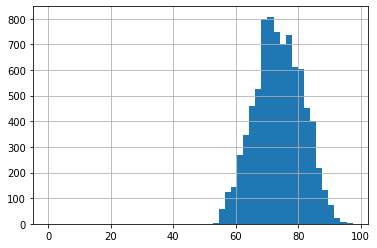

In [123]:
fmri_df['Age'].hist(bins  = 50)

<AxesSubplot:>

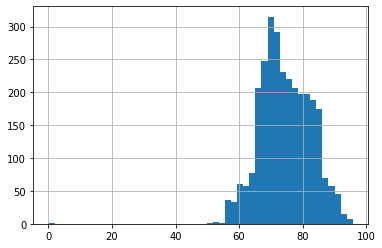

In [127]:
fmri_df[fmri_df['Research Group'] == 'CN']['Age'].hist(bins = 50)

<AxesSubplot:>

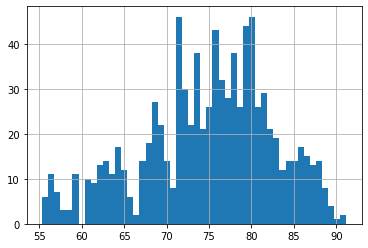

In [128]:
fmri_df[fmri_df['Research Group'] == 'AD']['Age'].hist(bins = 50)

<AxesSubplot:>

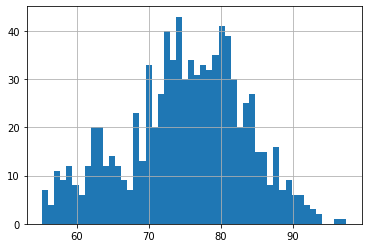

In [130]:
fmri_df[fmri_df['Research Group'] == 'MCI']['Age'].hist(bins = 50)

In [97]:
fmri_df['Research Group'].value_counts()

CN      2938
EMCI    2209
LMCI    1350
AD       887
MCI      866
Name: Research Group, dtype: int64

In [98]:
fmri_df['Description'].value_counts()

MoCoSeries                                         1839
relCBF                                             1829
Perfusion_Weighted                                 1821
Axial rsfMRI (Eyes Open)                            733
Resting State fMRI                                  726
Axial MB rsfMRI (Eyes Open)                         365
Axial fcMRI (EYES OPEN)                             293
Axial rsfMRI (EYES OPEN)                            259
Axial fcMRI (Eyes Open)                             127
Extended Resting State fMRI                         112
Axial rsfMRI (Eyes Open) -phase P to A               31
Axial fcMRI 0 angle (EYES OPEN)                      22
Axial MB rsfMRI (Eyes Open)   straight no angle      12
Axial RESTING fcMRI (EYES OPEN)                      11
Axial MB rsfMRI AP                                    9
SOURCE - Axial 2D PASL                                7
WIP SOURCE - Axial 3D pCASL (Eyes Open)               7
Axial fcMRI                                     

In [77]:
# keep a persons first fMRI scan 

fmri_df = fmri_df.drop_duplicates(subset = ['Subject ID', 'Research Group'], keep = 'first')

num_scans = len(pd.unique(fmri_df['Image ID']))
num_people = len(pd.unique(fmri_df['Subject ID']))

# Confirmation that no people change 'Research Group' 
# (i.e. do not go from Cognatively Normal(CN) to Mild Cognative Imparement (MCI)
assert(num_scans_test == num_people_test)

print(f'Number of scans: {num_scans}')
print(f'Number of people: {num_people}')

Number of scans: 1391
Number of people: 1391


In [78]:
num_ipc = len(pd.unique(fmri_df['Imaging Protocol']))

print(f'Number of Imaging Protocol Configurations: {num_ipc}')

Number of Imaging Protocol Configurations: 22


In [223]:
# fmri_df['Manufacturer'] = fmri_df['Imaging Protocol'].apply(lambda x : x[13:x.index(';F')])
# fmri_df['Field Strength'] = fmri_df['Imaging Protocol'].apply(lambda x : float(x[x.index('h=')+2:x.index(';S')]))
# fmri_df['Slice Thickness'] = fmri_df['Imaging Protocol'].apply(lambda x : float(x[x.index('s=')+2:x.index(';TE')]))
# fmri_df['TE'] = fmri_df['Imaging Protocol'].apply(lambda x : float(x[x.index('E=')+2:x.index(';TR')]))
# fmri_df['TR'] = fmri_df['Imaging Protocol'].apply(lambda x : float(x[x.index('R=')+2:]))
# fmri_df = fmri_df.drop(['Imaging Protocol'], axis = 1)

fmri_df.head()

,Subject ID,Sex,Research Group,Age,Modality,Description,Image ID,Manufacturer,Field Strength,Slice Thickness,TE,TR
0,002_S_0295,M,CN,90.0,fMRI,Resting State fMRI,238623,Philips Medical Systems,3.0,3.3,30.0,3000.0
1,002_S_0295,M,CN,91.0,fMRI,Resting State fMRI,303069,Philips Medical Systems,3.0,3.3,30.0,3001.0
2,002_S_0413,F,CN,81.5,fMRI,Resting State fMRI,240811,Philips Medical Systems,3.0,3.3,30.0,3000.0
3,002_S_0413,F,CN,82.4,fMRI,Resting State fMRI,304790,Philips Medical Systems,3.0,3.3,30.0,3001.0
4,002_S_0413,F,CN,83.4,fMRI,Resting State fMRI,371994,Philips Medical Systems,3.0,3.3,30.0,3001.0


In [185]:
fmri_df['Description'].value_counts()

MoCoSeries                                         1839
relCBF                                             1829
Perfusion_Weighted                                 1821
Axial rsfMRI (Eyes Open)                            733
Resting State fMRI                                  726
Axial MB rsfMRI (Eyes Open)                         365
Axial fcMRI (EYES OPEN)                             293
Axial rsfMRI (EYES OPEN)                            259
Axial fcMRI (Eyes Open)                             127
Extended Resting State fMRI                         112
Axial rsfMRI (Eyes Open) -phase P to A               31
Axial fcMRI 0 angle (EYES OPEN)                      22
Axial MB rsfMRI (Eyes Open)   straight no angle      12
Axial RESTING fcMRI (EYES OPEN)                      11
Axial MB rsfMRI AP                                    9
SOURCE - Axial 2D PASL                                7
WIP SOURCE - Axial 3D pCASL (Eyes Open)               7
Axial fcMRI                                     

In [186]:
fmri_df['Research Group'].value_counts()

CN      2938
EMCI    2209
LMCI    1350
AD       887
MCI      866
Name: Research Group, dtype: int64

In [187]:
fmri_df['Manufacturer'].value_counts()

SIEMENS                    6583
Philips Medical Systems    1054
GE MEDICAL SYSTEMS          467
Philips                      64
Philips Healthcare           61
Siemens                      21
Name: Manufacturer, dtype: int64

In [199]:
fmri_df[fmri_df['Description'] == 'Extended Resting State fMRI']

,Subject ID,Sex,Research Group,Age,Modality,Description,Image ID,Manufacturer,Field Strength,Slice Thickness,TE,TR
5,002_S_0413,F,CN,84.4,fMRI,Extended Resting State fMRI,423209,Philips Medical Systems,3.0,3.3,30.0,3004.0
6,002_S_0413,F,CN,85.5,fMRI,Extended Resting State fMRI,569636,Philips Medical Systems,3.0,3.3,30.0,3025.0
18,002_S_1155,M,MCI,66.1,fMRI,Extended Resting State fMRI,467646,Philips Medical Systems,3.0,3.3,30.0,3004.0
25,002_S_1261,F,CN,78.3,fMRI,Extended Resting State fMRI,418009,Philips Medical Systems,3.0,3.3,30.0,3004.0
26,002_S_1261,F,CN,79.6,fMRI,Extended Resting State fMRI,495943,Philips Medical Systems,3.0,3.3,30.0,3025.0
35,002_S_1280,F,CN,77.9,fMRI,Extended Resting State fMRI,418025,Philips Medical Systems,3.0,3.3,30.0,3004.0
36,002_S_1280,F,CN,79.1,fMRI,Extended Resting State fMRI,491327,Philips Medical Systems,3.0,3.3,30.0,3025.0
45,002_S_2010,F,EMCI,68.2,fMRI,Extended Resting State fMRI,505156,Philips Medical Systems,3.0,3.3,30.0,3025.0
55,002_S_2073,F,EMCI,67.5,fMRI,Extended Resting State fMRI,444161,Philips Medical Systems,3.0,3.3,30.0,3004.0
56,002_S_2073,F,EMCI,69.6,fMRI,Extended Resting State fMRI,780966,Philips Medical Systems,3.0,3.3,30.0,3025.0


In [233]:
fmri_df[fmri_df['Description'] == 'MoCoSeries']

,Subject ID,Sex,Research Group,Age,Modality,Description,Image ID,Manufacturer,Field Strength,Slice Thickness,TE,TR
460,009_S_0751,M,CN,77.1,fMRI,MoCoSeries,331750,SIEMENS,3.0,4.0,13.0,3400.0
464,009_S_0751,M,CN,78.1,fMRI,MoCoSeries,390978,SIEMENS,3.0,4.0,13.0,3400.0
465,009_S_0751,M,CN,79.1,fMRI,MoCoSeries,445548,SIEMENS,3.0,4.0,13.0,3400.0
472,009_S_0842,M,CN,78.9,fMRI,MoCoSeries,499409,SIEMENS,3.0,4.0,13.0,3400.0
475,009_S_0842,M,CN,79.9,fMRI,MoCoSeries,343553,SIEMENS,3.0,4.0,13.0,3400.0
478,009_S_0842,M,CN,80.9,fMRI,MoCoSeries,499405,SIEMENS,3.0,4.0,13.0,3400.0
479,009_S_0842,M,CN,80.9,fMRI,MoCoSeries,499389,SIEMENS,3.0,4.0,13.0,3400.0
485,009_S_0842,M,CN,81.8,fMRI,MoCoSeries,448586,SIEMENS,3.0,4.0,13.0,3400.0
488,009_S_1030,M,MCI,72.6,fMRI,MoCoSeries,266817,SIEMENS,3.0,4.0,13.0,3400.0
491,009_S_1030,M,MCI,73.6,fMRI,MoCoSeries,499426,SIEMENS,3.0,4.0,13.0,3400.0


In [231]:
fmri_df[fmri_df['Description'] == 'relCBF']

,Subject ID,Sex,Research Group,Age,Modality,Description,Image ID,Manufacturer,Field Strength,Slice Thickness,TE,TR
461,009_S_0751,M,CN,77.1,fMRI,relCBF,331756,SIEMENS,3.0,4.0,13.0,3400.0
462,009_S_0751,M,CN,78.1,fMRI,relCBF,390974,SIEMENS,3.0,4.0,13.0,3400.0
466,009_S_0751,M,CN,79.1,fMRI,relCBF,445554,SIEMENS,3.0,4.0,13.0,3400.0
474,009_S_0842,M,CN,78.9,fMRI,relCBF,499418,SIEMENS,3.0,4.0,13.0,3400.0
476,009_S_0842,M,CN,79.9,fMRI,relCBF,343554,SIEMENS,3.0,4.0,13.0,3400.0
482,009_S_0842,M,CN,80.9,fMRI,relCBF,499402,SIEMENS,3.0,4.0,13.0,3400.0
483,009_S_0842,M,CN,80.9,fMRI,relCBF,499396,SIEMENS,3.0,4.0,13.0,3400.0
484,009_S_0842,M,CN,81.8,fMRI,relCBF,448585,SIEMENS,3.0,4.0,13.0,3400.0
489,009_S_1030,M,MCI,72.6,fMRI,relCBF,266821,SIEMENS,3.0,4.0,13.0,3400.0
490,009_S_1030,M,MCI,73.6,fMRI,relCBF,499421,SIEMENS,3.0,4.0,13.0,3400.0


In [232]:
fmri_df[fmri_df['Description'] == 'Perfusion_Weighted']

,Subject ID,Sex,Research Group,Age,Modality,Description,Image ID,Manufacturer,Field Strength,Slice Thickness,TE,TR
459,009_S_0751,M,CN,77.1,fMRI,Perfusion_Weighted,331744,SIEMENS,3.0,4.0,13.0,3400.0
463,009_S_0751,M,CN,78.1,fMRI,Perfusion_Weighted,390976,SIEMENS,3.0,4.0,13.0,3400.0
467,009_S_0751,M,CN,79.1,fMRI,Perfusion_Weighted,445556,SIEMENS,3.0,4.0,13.0,3400.0
473,009_S_0842,M,CN,78.9,fMRI,Perfusion_Weighted,499416,SIEMENS,3.0,4.0,13.0,3400.0
477,009_S_0842,M,CN,79.9,fMRI,Perfusion_Weighted,343557,SIEMENS,3.0,4.0,13.0,3400.0
480,009_S_0842,M,CN,80.9,fMRI,Perfusion_Weighted,499403,SIEMENS,3.0,4.0,13.0,3400.0
481,009_S_0842,M,CN,80.9,fMRI,Perfusion_Weighted,499393,SIEMENS,3.0,4.0,13.0,3400.0
486,009_S_0842,M,CN,81.8,fMRI,Perfusion_Weighted,448590,SIEMENS,3.0,4.0,13.0,3400.0
487,009_S_1030,M,MCI,72.6,fMRI,Perfusion_Weighted,266811,SIEMENS,3.0,4.0,13.0,3400.0
492,009_S_1030,M,MCI,73.6,fMRI,Perfusion_Weighted,499433,SIEMENS,3.0,4.0,13.0,3400.0


In [ ]:
All data that 

Resting State fMRI 
MoCoSeries  
Perfusion_Weighted 
relCBF                 
Extended Resting State fMRI         
